## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading the Data

In [4]:
# load the dataset from a CSV file named 'adult.csv' into a pandas DataFrame
# named 'cd' for Census Data
cd = pd.read_csv('adult.csv')

# Display the first 5 rows of the DataFrame to get an overview of the data
cd.head(5)

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
# number of rows and columns
cd.shape

(32561, 15)

In [6]:
# data types of each column
cd.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
# number of unique values in each column
cd.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [8]:
# descriptive statistics for the DataFrame 'cd', transposed for better readability
cd.describe().T
# age, fnlwgt, educational.num, capital.gain, capital.loss, hours.per.week

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [9]:
# count the occurrences of each unique value in the 'income' column
cd['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

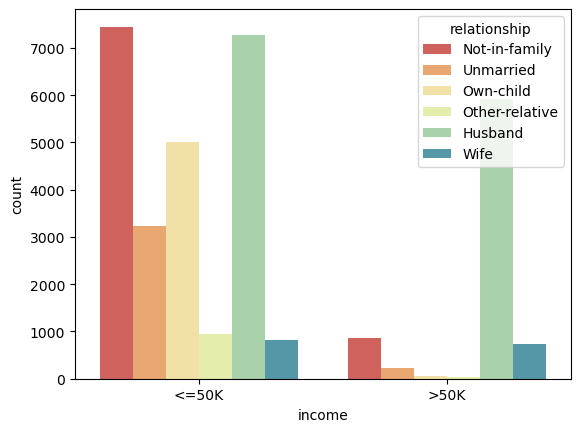

In [10]:
# create a count plot to visualize the distribution of the 'income' column, 
# with bars colored according to the 'relationship' column
sns.countplot(x='income', palette='Spectral', hue='relationship', data=cd);

## Replacing the "?" values

In [12]:
# replace missing or unknown values with mode of the data
cd['workclass'] = cd['workclass'].replace('?', 'Private')
cd[ 'occupation'] = cd[ 'occupation' ].replace("?", 'Prof-specialty')
cd[ 'native.country'] = cd[ 'native.country'].replace("?", 'United-States')
cd.head(10)

age    workclass  fnlwgt     education  education.num marital.status  \
0   90      Private   77053       HS-grad              9        Widowed   
1   82      Private  132870       HS-grad              9        Widowed   
2   66      Private  186061  Some-college             10        Widowed   
3   54      Private  140359       7th-8th              4       Divorced   
4   41      Private  264663  Some-college             10      Separated   
5   34      Private  216864       HS-grad              9       Divorced   
6   38      Private  150601          10th              6      Separated   
7   74    State-gov   88638     Doctorate             16  Never-married   
8   68  Federal-gov  422013       HS-grad              9       Divorced   
9   41      Private   70037  Some-college             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0     Prof-specialty   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family  White  Female             0   
2     Prof-specialty       Unmarried  Black  Female             0   
3  Machine-op-inspct       Unmarried  White  Female             0   
4     Prof-specialty       Own-child  White  Female             0   
5      Other-service       Unmarried  White  Female             0   
6       Adm-clerical       Unmarried  White    Male             0   
7     Prof-specialty  Other-relative  White  Female             0   
8     Prof-specialty   Not-in-family  White  Female             0   
9       Craft-repair       Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K  
7          3683              20  United-States   >50K  
8          3683              40  United-States  <=50K  
9          3004              60  United-States   >50K

In [13]:
# or drop rows completely depending on amount of unknown
cd.replace('?', pd.NA, inplace=True)
cd.dropna(inplace=True)

## Feature Engineering and Analysis

In [15]:
# count the occurrences of each unique value in the 'education' column
cd['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [16]:
# replace various groups of data with more simple/general terms
cd.education=cd.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'],'No HS Diploma')
cd.education=cd.education.replace(['HS-grad'], 'HS Diploma')
cd.education=cd.education.replace(['Assoc-voc' ,'Assoc-acdm','Prof-school', 'Some-college'], 'Higher Ed')
cd['marital.status']=cd['marital.status'].replace(['Separated','Divorced','Married-spouse-absent'],'Separated')

cd.head(10)

age    workclass  fnlwgt      education  education.num marital.status  \
0   90      Private   77053     HS Diploma              9        Widowed   
1   82      Private  132870     HS Diploma              9        Widowed   
2   66      Private  186061      Higher Ed             10        Widowed   
3   54      Private  140359  No HS Diploma              4      Separated   
4   41      Private  264663      Higher Ed             10      Separated   
5   34      Private  216864     HS Diploma              9      Separated   
6   38      Private  150601  No HS Diploma              6      Separated   
7   74    State-gov   88638      Doctorate             16  Never-married   
8   68  Federal-gov  422013     HS Diploma              9      Separated   
9   41      Private   70037      Higher Ed             10  Never-married   

          occupation    relationship   race     sex  capital.gain  \
0     Prof-specialty   Not-in-family  White  Female             0   
1    Exec-managerial   Not-in-family  White  Female             0   
2     Prof-specialty       Unmarried  Black  Female             0   
3  Machine-op-inspct       Unmarried  White  Female             0   
4     Prof-specialty       Own-child  White  Female             0   
5      Other-service       Unmarried  White  Female             0   
6       Adm-clerical       Unmarried  White    Male             0   
7     Prof-specialty  Other-relative  White  Female             0   
8     Prof-specialty   Not-in-family  White  Female             0   
9       Craft-repair       Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K  
7          3683              20  United-States   >50K  
8          3683              40  United-States  <=50K  
9          3004              60  United-States   >50K

In [17]:
# filter the DataFrame to only include numeric columns
numeric_cd = cd.select_dtypes(include=['number'])

# calculate the correlation matrix
numeric_cd.corr()

age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018768  
education.num         0.148123  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000

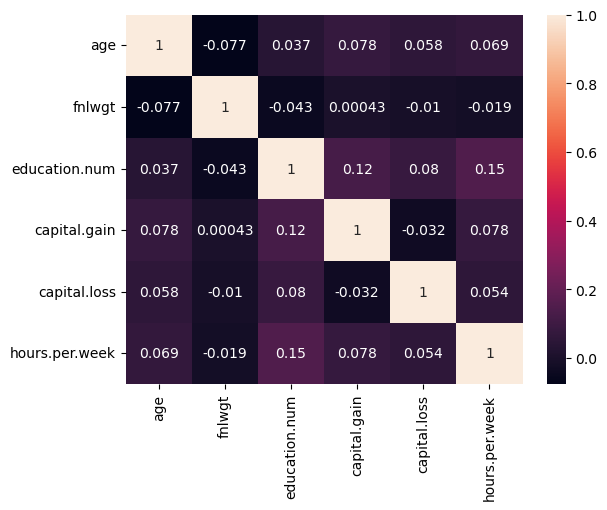

In [18]:
# heatmap of the correlation matrix
sns.heatmap(numeric_cd.corr(),annot=True);

## Histogram

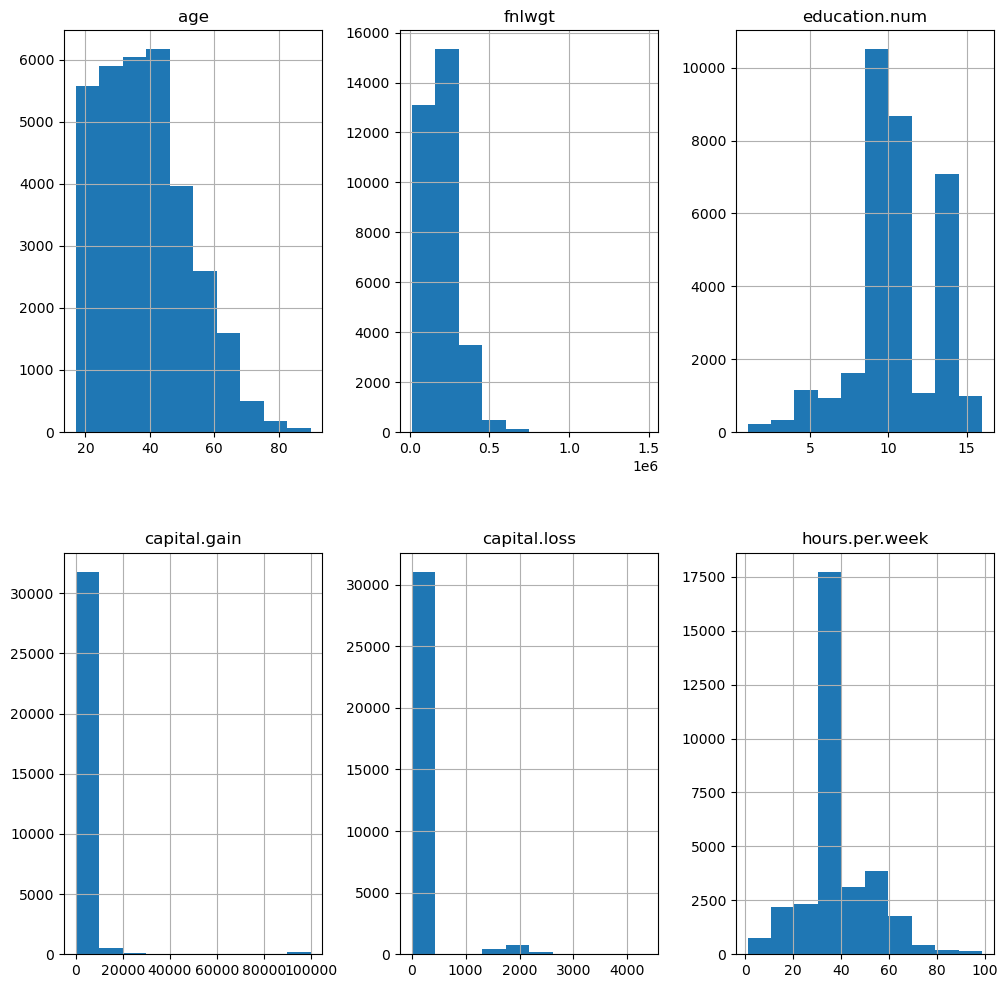

In [20]:
# histograms to visualize the census dataset we are working with
numeric_cd.hist(figsize=(12,12), layout=(2,3), sharex=False);

## Boxplot

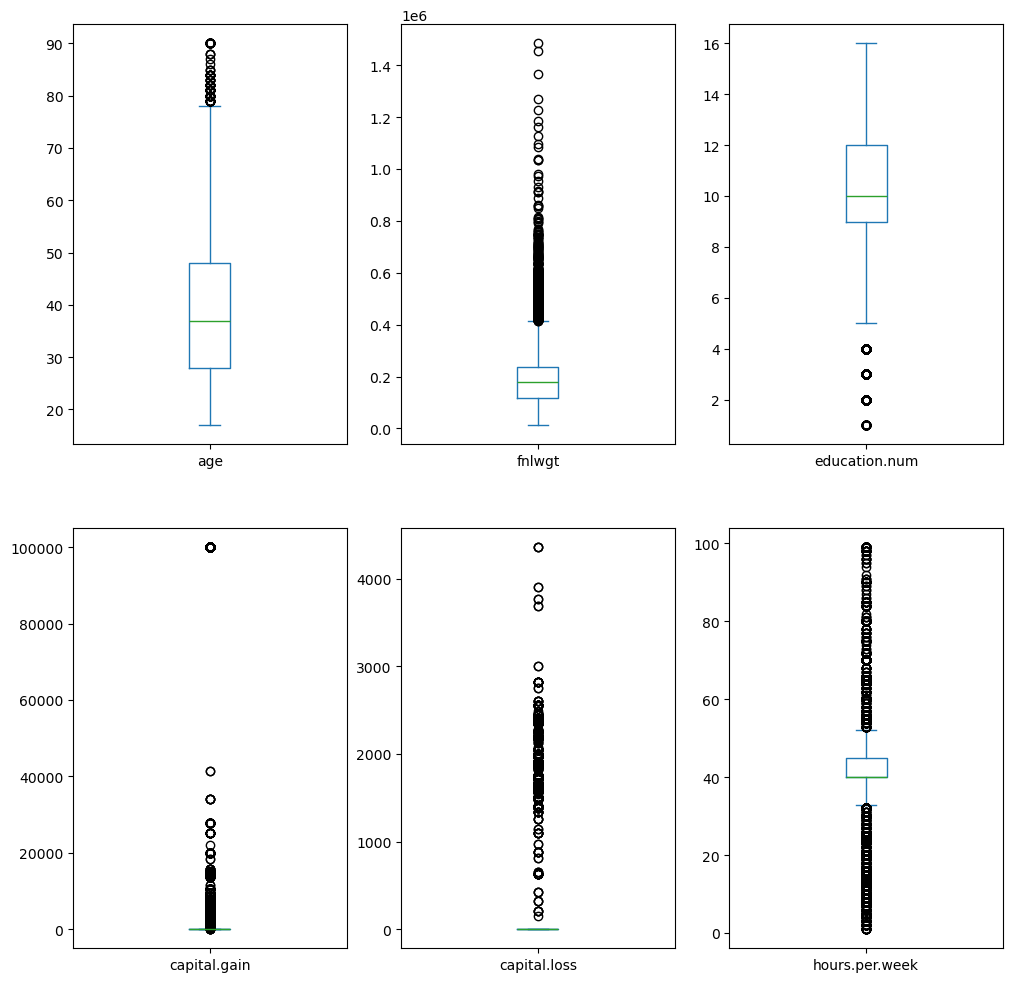

In [22]:
# boxplot to view outliers, median, and quartiles
cd.plot(kind='box', figsize=(12,12), layout=(2,3), sharex=False, subplots=True);

## Pie Chart

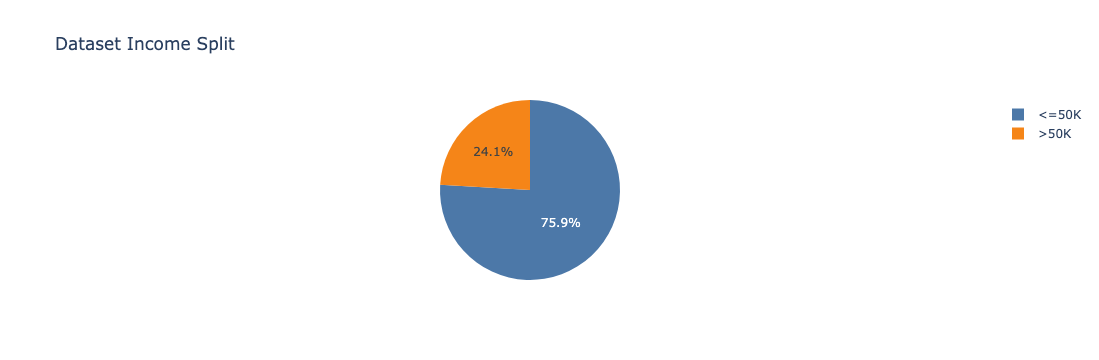

In [24]:
# pie chart to visualize the distribution of income categories
income_counts = cd['income'].value_counts()
px.pie(income_counts, values=income_counts, 
             names=income_counts.index, 
             title='Dataset Income Split',
             color_discrete_sequence=px.colors.qualitative.T10)

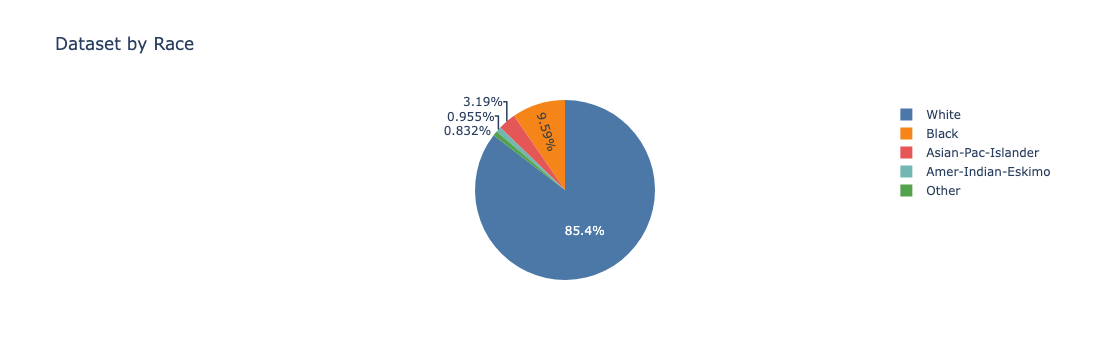

In [25]:
# pie chart to visualize the distribution of race categories
race_counts = cd['race'].value_counts()
px.pie(race_counts, values=race_counts, 
             names=race_counts.index, 
             title='Dataset by Race',
             color_discrete_sequence=px.colors.qualitative.T10)

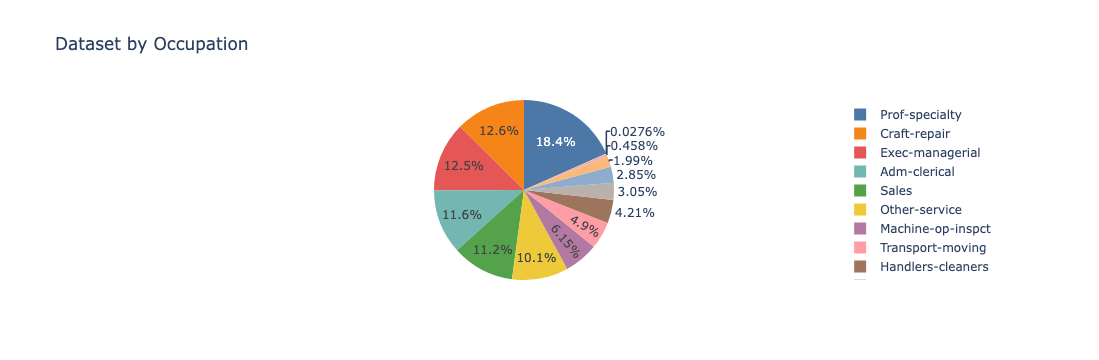

In [26]:
# pie chart to visualize the distribution of occupation categories
occupation_counts = cd['occupation'].value_counts()
px.pie(occupation_counts, values=occupation_counts, 
             names=occupation_counts.index, 
             title='Dataset by Occupation',
             color_discrete_sequence=px.colors.qualitative.T10)

## Trends and Biases

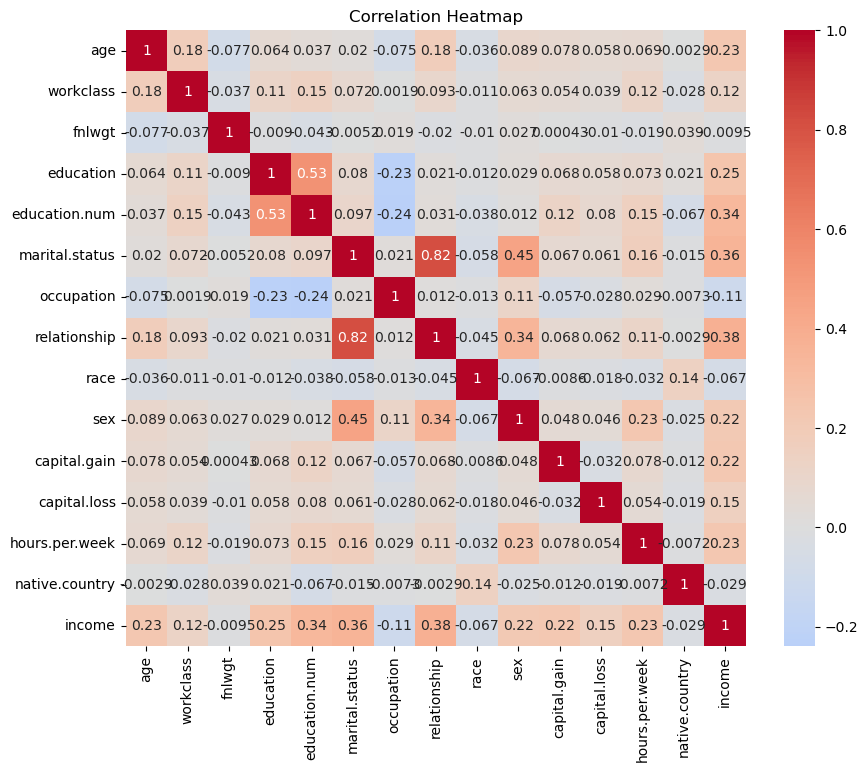

In [28]:
cd_numeric = cd.copy()

# convert all categorical columns in 'cd_numeric' to numeric values using factorization
for column in cd.select_dtypes(include=['object']):
    cd_numeric[column] = pd.factorize(cd_numeric[column])[0]

# create a heatmap to visualize the correlation matrix
corr = cd_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

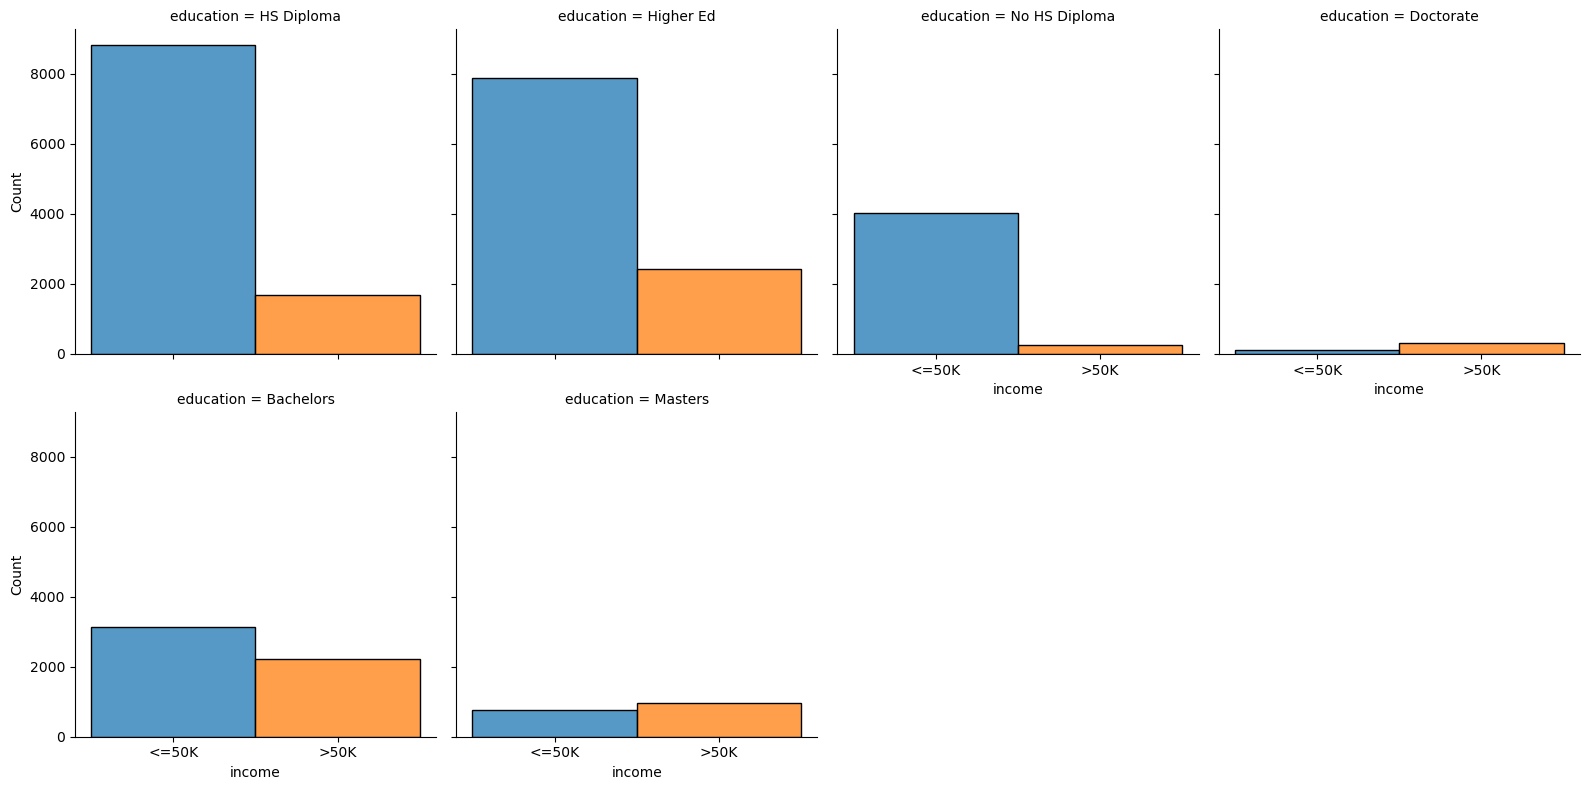

In [29]:
# FacetGrid to visualize the distribution of 'income' across different 'education' levels
g = sns.FacetGrid(cd, col='education', hue='income', col_wrap=4, height=4)
g.map(sns.histplot, 'income')
plt.show()

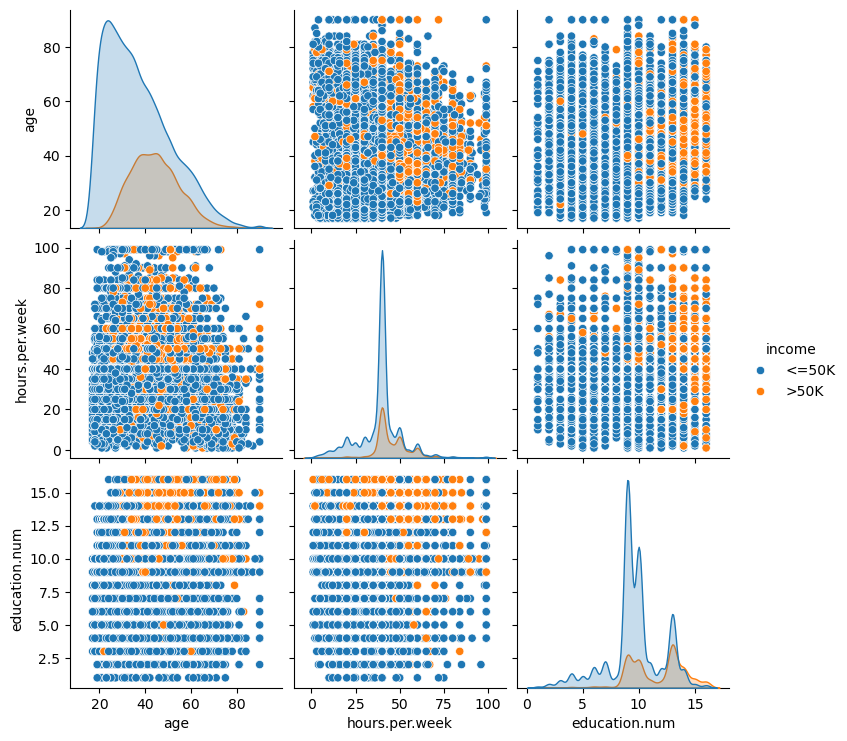

In [30]:
# visualize pairwise relationships between selected numerical variables
sns.pairplot(cd, hue='income', vars=['age', 'hours.per.week', 'education.num'])
plt.show()

## Building the Predictive Model

In [32]:
# drop the 'income' column from the DataFrame 'cd' to create the feature set 'x'
x = cd.drop(['income'], axis=1)

# use the 'income' column to create the target variable 'y'
y = cd['income']

## Scaling the Features

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [35]:
cd2 = cd.copy()

# apply Label Encoding to all columns which converts categorical values to numeric values
cd2 = cd2.apply(LabelEncoder().fit_transform)
cd2.head(8)

age  workclass  fnlwgt  education  education.num  marital.status  \
0   72          3    2649          2              8               4   
1   65          3    6514          2              8               4   
2   49          3   11175          3              9               4   
3   37          3    7009          5              3               3   
4   24          3   16850          3              9               3   
5   17          3   14182          2              8               3   
6   21          3    7800          5              5               3   
7   57          6    3183          1             15               2   

   occupation  relationship  race  sex  capital.gain  capital.loss  \
0           9             1     4    0             0            91   
1           3             1     4    0             0            91   
2           9             4     2    0             0            91   
3           6             4     4    0             0            90   
4           9             3     4    0             0            90   
5           7             4     4    0             0            89   
6           0             4     4    1             0            89   
7           9             2     4    0             0            88   

   hours.per.week  native.country  income  
0              39              38       0  
1              17              38       0  
2              39              38       0  
3              39              38       0  
4              39              38       0  
5              44              38       0  
6              39              38       0  
7              19              38       1

In [36]:
features = cd2.drop('income', axis=1).columns
sScaler = StandardScaler().fit(cd2.drop('income', axis=1))
x = sScaler.transform(cd2.drop('income', axis=1))
y = cd['income']


# scale data while keeping it in a DataFrame
features = cd2.drop('income', axis=1).columns
sScaler = StandardScaler()

# transform the data and convert it back to a DataFrame
x_scaled = pd.DataFrame(sScaler.fit_transform(cd2.drop('income', axis=1)), columns=features)
y = cd2['income']

# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# Bias Mitigation
# drop 'income' and the specified features from the DataFrame
features_to_drop = ['income', 'sex', 'race', 'capital.loss', 'fnlwgt', 'workclass']
cd_reduced = cd2.drop(columns=features_to_drop)

# fit the StandardScaler on the reduced DataFrame
sScaler = StandardScaler().fit(cd_reduced)

# transform the data
x2 = sScaler.transform(cd_reduced)

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 70% of the data will be used for training and 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

# fit the Logistic Regression model to the training data
lr = LogisticRegression()
model = lr.fit(x_train, y_train)

# predict the target variable for the test data 
lrPrediction = model.predict(x_test)

# print the accuracy of the model on the training/testing data
print("Training Data Accuracy: {:,.5f}".format(lr.score(x_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(lr.score(x_test, y_test)))

Training Data Accuracy: 0.83788
Test Data Accuracy: 0.83601


In [39]:
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.3, random_state=40)

# repeat LR model from above except with x2 (bias mitigation)

lr = LogisticRegression()
model = lr.fit(x2_train, y_train)
lrPrediction2 = model.predict(x2_test)
print("Training Data Accuracy: {:,.5f}".format(lr.score(x2_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(lr.score(x2_test, y_test)))

Training Data Accuracy: 0.83358
Test Data Accuracy: 0.82997


## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

# repeat LR model from above except fitting and training RFC model
rfc = RandomForestClassifier()
rfcModel = rfc.fit(x_train, y_train)
rfcPrediction = rfcModel.predict(x_test)
print("Training Data Accuracy: {:,.5f}".format(rfc.score(x_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(rfc.score(x_test, y_test)))

Training Data Accuracy: 1.00000
Test Data Accuracy: 0.85546


In [42]:
# repeat RFC model from above except with x2 (bias mitigation)
rfc = RandomForestClassifier()
rfcModel2 = rfc.fit(x2_train, y_train)
rfcPrediction2 = rfcModel2.predict(x2_test)
print("Training Data Accuracy: {:,.5f}".format(rfc.score(x2_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(rfc.score(x2_test, y_test)))

Training Data Accuracy: 0.96196
Test Data Accuracy: 0.82803


## Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

In [45]:
# repeat LR model from above except fitting and training GNB model
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnbPrediction = gnb.predict(x_test)
print("Training Data Accuracy: {:,.5f}".format(gnb.score(x_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(gnb.score(x_test, y_test)))

Training Data Accuracy: 0.82042
Test Data Accuracy: 0.82168


## Multilayer Perceptron

In [47]:
from sklearn.neural_network import MLPClassifier

In [48]:
# repeat LR model from above except fitting and training MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(x_train, y_train)
mlpPrediction = mlp.predict(x_test)
print("Training Data Accuracy: {:,.5f}".format(mlp.score(x_train, y_train)))
print("Test Data Accuracy: {:,.5f}".format(mlp.score(x_test, y_test)))

Training Data Accuracy: 0.92440
Test Data Accuracy: 0.82537


## Data Accuracy Report

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# printing our confusion matrices and classification reports of all models used above,
# including bias mitigation variations

In [51]:
print(confusion_matrix(y_test, rfcPrediction))

[[6894  512]
 [ 900 1463]]


In [52]:
print(classification_report(y_test, rfcPrediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7406
           1       0.74      0.62      0.67      2363

    accuracy                           0.86      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [53]:
print(confusion_matrix(y_test, rfcPrediction2))

[[6689  717]
 [ 963 1400]]


In [54]:
print(classification_report(y_test, rfcPrediction2))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7406
           1       0.66      0.59      0.62      2363

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.82      0.83      0.82      9769



In [55]:
print(confusion_matrix(y_test, lrPrediction))

[[6936  470]
 [1132 1231]]


In [56]:
print(classification_report(y_test, lrPrediction))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7406
           1       0.72      0.52      0.61      2363

    accuracy                           0.84      9769
   macro avg       0.79      0.73      0.75      9769
weighted avg       0.83      0.84      0.83      9769



In [57]:
print(confusion_matrix(y_test, lrPrediction2))

[[6911  495]
 [1166 1197]]


In [58]:
print(classification_report(y_test, lrPrediction2))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7406
           1       0.71      0.51      0.59      2363

    accuracy                           0.83      9769
   macro avg       0.78      0.72      0.74      9769
weighted avg       0.82      0.83      0.82      9769



In [59]:
print(confusion_matrix(y_test, gnbPrediction))

[[6872  534]
 [1208 1155]]


In [60]:
print(classification_report(y_test, gnbPrediction))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7406
           1       0.68      0.49      0.57      2363

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [61]:
print(confusion_matrix(y_test, mlpPrediction))

[[6669  737]
 [ 969 1394]]


In [62]:
print(classification_report(y_test, mlpPrediction))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      7406
           1       0.65      0.59      0.62      2363

    accuracy                           0.83      9769
   macro avg       0.76      0.75      0.75      9769
weighted avg       0.82      0.83      0.82      9769



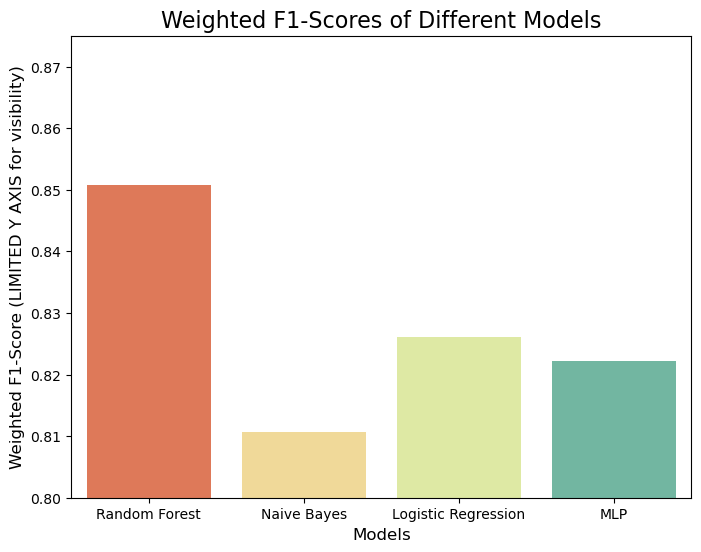

In [63]:
from sklearn.metrics import f1_score

# comparing predictive models using weighted F1 scores
rfc_f1 = f1_score(y_test, rfcPrediction, average='weighted')
gnb_f1 = f1_score(y_test, gnbPrediction, average='weighted')
lr_f1 = f1_score(y_test, lrPrediction, average='weighted')
mlp_f1 = f1_score(y_test, mlpPrediction, average='weighted')


models = ['Random Forest', 'Naive Bayes', 'Logistic Regression', 'MLP']
f1_scores = [rfc_f1, gnb_f1, lr_f1, mlp_f1]

# create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=models, y=f1_scores, hue=models, palette='Spectral', legend=False)

# add labels and title
plt.title('Weighted F1-Scores of Different Models', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Weighted F1-Score (LIMITED Y AXIS for visibility)', fontsize=12)
plt.ylim(0.8, 0.875)
plt.show()

## Non-Profit Investment

In [74]:
""" A non-profit organization is looking to invest $50 million to improve 
the economic outcomes of a specific demographic group. Based on your analysis, 
recommend which group(s) would benefit most from this investment and suggest 
specific initiatives they should fund (e.g., educational programs, vocational 
training, early career support).
"""
features = cd2.drop('income', axis=1).columns
feature_importances = rfcModel.feature_importances_

# create a DataFrame with feature names and their importance
importance_cd = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_cd = importance_cd.sort_values(by='Importance', ascending=False)

print(importance_cd)

           Feature  Importance
2           fnlwgt    0.167410
0              age    0.151237
10    capital.gain    0.112886
5   marital.status    0.099764
4    education.num    0.094139
12  hours.per.week    0.085672
7     relationship    0.080062
6       occupation    0.065114
1        workclass    0.039537
11    capital.loss    0.032129
3        education    0.030313
13  native.country    0.015181
8             race    0.014515
9              sex    0.012042


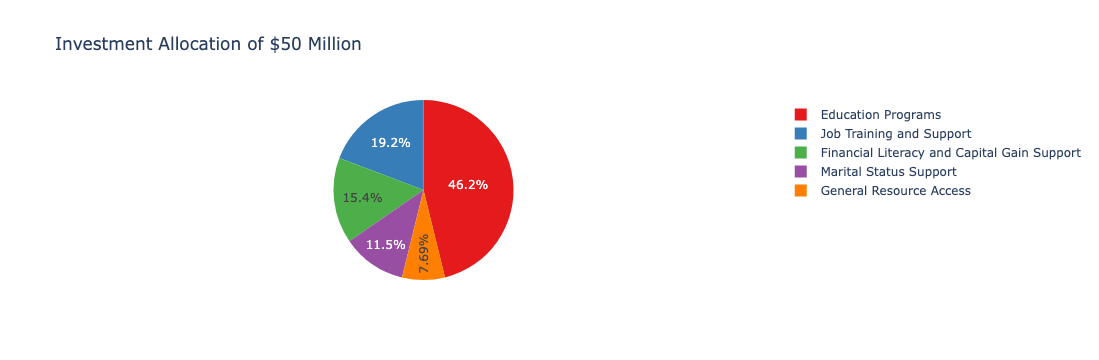

In [76]:
# In control: Education.num/education, occupation, capital.gain, marital status

# investment amounts based on relative importance scores
investment_amounts = {
    'Education Programs': 30_000_000,
    'Job Training and Support': 12_500_000,
    'Financial Literacy and Capital Gain Support': 10_000_000,
    'Marital Status Support': 7_500_000,
    'General Resource Access': 5_000_000
}

# create pie chart
fig = px.pie(
    names=list(investment_amounts.keys()),
    values=list(investment_amounts.values()),
    title='Investment Allocation of $50 Million',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# show the chart
fig.show()

## Bias Detection/Mitigation

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

/opt/anaconda3/lib/python3.12/site

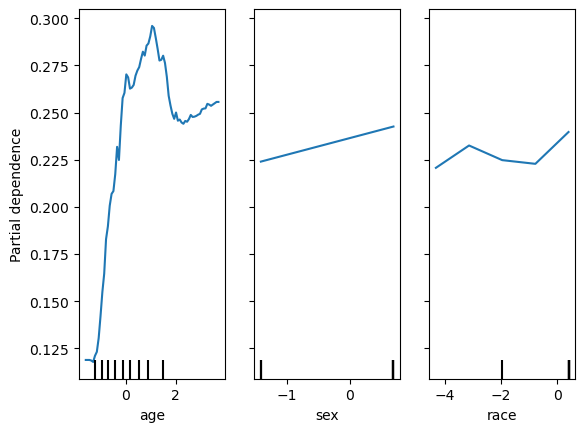

In [80]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# scale data while keeping it in a DataFrame
features = cd2.drop('income', axis=1).columns
sScaler = StandardScaler()

# transform the data and convert it back to a DataFrame
x_scaled = pd.DataFrame(sScaler.fit_transform(cd2.drop('income', axis=1)), columns=features)
y = cd2['income']

# split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


# plot partial dependence for 'age' and 'sex'
features_to_plot = ['age', 'sex', 'race']  # You can replace or add other features like 'race', 'education', etc.

# create Partial Dependence Plots
PartialDependenceDisplay.from_estimator(rfcModel, X=x_test, features=features_to_plot, kind="average")

# show the plot
plt.show()

# Scroll down to see charts
# Standard scale creates x-axis where 0 is the mean, and the values represent # of standard deviations from mean
# males are 0, white is 4
